In [23]:
from __future__ import division
import random
import math
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [24]:
warnings.filterwarnings('ignore')
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
names = []
for i in range(32):
  names.append(i)
dataset = pd.read_csv(url,names=names)
dataset.shape
dataset = dataset.drop(0, axis=1)
dataset2 = dataset.iloc[:,1:]
dataset.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
XER = dataset.values[:,1:]
YER = dataset.values[:, 0:1]
X_trainER, X_validationER, Y_trainER, Y_validationER = model_selection.train_test_split(XER, YER, test_size=0.2)
knnER = KNeighborsClassifier(n_neighbors=5)
knnER.fit(X_trainER, Y_trainER)
predictionsER = knnER.predict(X_validationER)
ER = zero_one_loss(Y_validationER, predictionsER)



In [26]:
def func1(x):
  dt = dataset2
  for i in range(len(x)):
      if(round(x[i])==0):
        dt = dt.drop([i+2], axis=1)
  array = dt.values
  X = array[:,1:dt.shape[1]-1]
  Y = dataset.values[:, 0:1]
  X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2)
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train, Y_train)
  predictions = knn.predict(X_validation)
  error = zero_one_loss(Y_validation, predictions)
  features = X.shape[1]
  alpha = random.uniform(0,0.49)
  classification_accuracy = error/ER
  if classification_accuracy > 1:
    classification_accuracy = 1


  fitness = alpha*features/30 + (1 - alpha) * classification_accuracy


  return fitness

In [27]:
class Particle:
    def __init__(self,x0):
        self.position_i=[]          
        self.velocity_i=[]         
        self.pos_best_i=[]          
        self.err_best_i=1          
        self.err_i=1               

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        if self.err_i < self.err_best_i:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    def update_velocity(self,pos_best_g):
        w=0.5       
        c1=1        
        c2=2        

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

   
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]

In [28]:
class PSO():
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        self.err_best_g=1.0                   
        self.pos_best_g=[]
        self.err_list = []                 
       
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))
       
        i=0
        while i < maxiter:
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                if swarm[j].err_i < self.err_best_g:
                    self.err_best_g=float(swarm[j].err_i)
                    self.pos_best_g=swarm[j].position_i

            for j in range(0,num_particles):
                swarm[j].update_velocity(self.pos_best_g)
                swarm[j].update_position(bounds)
            self.err_list.append(self.err_best_g)
            i+=1


In [29]:
initial=[]
bounds = []
for i in range(30):
  bounds.append((0,1))
  initial.append(random.random())               

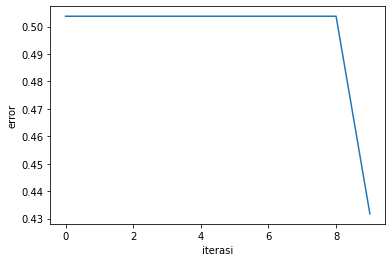

In [34]:
pso = PSO(func1,initial,bounds,num_particles=5,maxiter=10)
plt.plot(pso.err_list)
plt.ylabel('error')
plt.xlabel('iterasi')
plt.show()

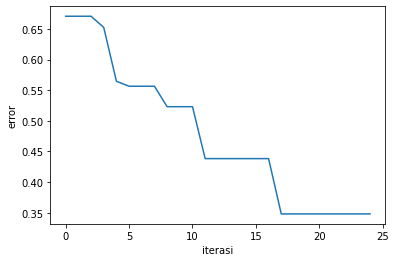

In [35]:
pso = PSO(func1,initial,bounds,num_particles=5,maxiter=25)
plt.plot(pso.err_list)
plt.ylabel('error')
plt.xlabel('iterasi')
plt.show()

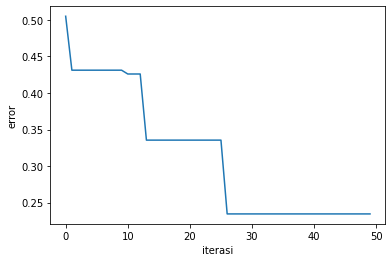

In [36]:
pso = PSO(func1,initial,bounds,num_particles=5,maxiter=50)
plt.plot(pso.err_list)
plt.ylabel('error')
plt.xlabel('iterasi')
plt.show()

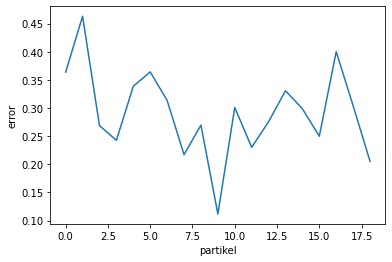

In [47]:
progress = []
for i in range(1,20):
  pso = PSO(func1,initial,bounds,num_particles=i,maxiter=27)
  progress.append(pso.err_best_g)
plt.plot(progress)
plt.ylabel('error')
plt.xlabel('partikel')
plt.show()

In [49]:
pso = PSO(func1,initial,bounds,num_particles=9,maxiter=27)
df = dataset
for i in range(len(pso.pos_best_g)):
    if(round(pso.pos_best_g[i])==0):
      df = df.drop([i+2], axis=1)
df.head()

,1,2,5,7,8,12,16,19,23,24,25,29
0,M,17.99,1001.0,0.27760,0.3001,1.0950,0.006399,0.01587,17.33,184.60,2019.0,0.2654
1,M,20.57,1326.0,0.07864,0.0869,0.5435,0.005225,0.01340,23.41,158.80,1956.0,0.1860
2,M,19.69,1203.0,0.15990,0.1974,0.7456,0.006150,0.02058,25.53,152.50,1709.0,0.2430
3,M,11.42,386.1,0.28390,0.2414,0.4956,0.009110,0.01867,26.50,98.87,567.7,0.2575
4,M,20.29,1297.0,0.13280,0.1980,0.7572,0.011490,0.01885,16.67,152.20,1575.0,0.1625


In [62]:
array = df.values
X = array[:,1:df.shape[1]-1]
Y = array[:,0:1]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print("Akurasi :", accuracy_score(Y_validation, predictions))

Akurasi : 0.956140350877193


In [66]:
array = dataset.values
X = array[:,1:dataset.shape[1]-1]
Y = array[:,0:1]
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train, Y_train)
predictions = knn2.predict(X_validation)
print("Akurasi :", accuracy_score(Y_validation, predictions))

Akurasi : 0.8947368421052632
